In [13]:
import pandas as pd
import numpy as np
import os

#daten laden
df = pd.read_csv('C:/Users/sahan/Codin_Projects/Parkinson/data/parkinsons.data')

# Die ersten 5 Zeilen anzeigen
print("Daten erfolgreich geladen!")
display(df.head())

# Kurze Info über Spalten und fehlende Werte
df.info()

Daten erfolgreich geladen!


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Features und Zielvariable trennen
# Wir lassen 'name' weg, da es keine medizinische Relevanz hat
features = df.loc[:, df.columns != 'status'].drop('name', axis=1)
labels = df['status']

# 2. Daten skalieren (Werte zwischen -1 und 1 bringen)
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)
y = labels

# 3. Train-Test-Split (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainingsdaten: {X_train.shape}, Testdaten: {X_test.shape}")

Trainingsdaten: (156, 22), Testdaten: (39, 22)


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = XGBClassifier(learning_rate=0.1, max_depth=5, eval_metric='logloss')

# Training 
model.fit(X_train, y_train)

# Vorhersage
y_pred = model.predict(X_test)

# Ergebnisse
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy * 100:.2f}%")
print("\nBericht:")
print(classification_report(y_test, y_pred))


Genauigkeit: 94.87%

Bericht:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



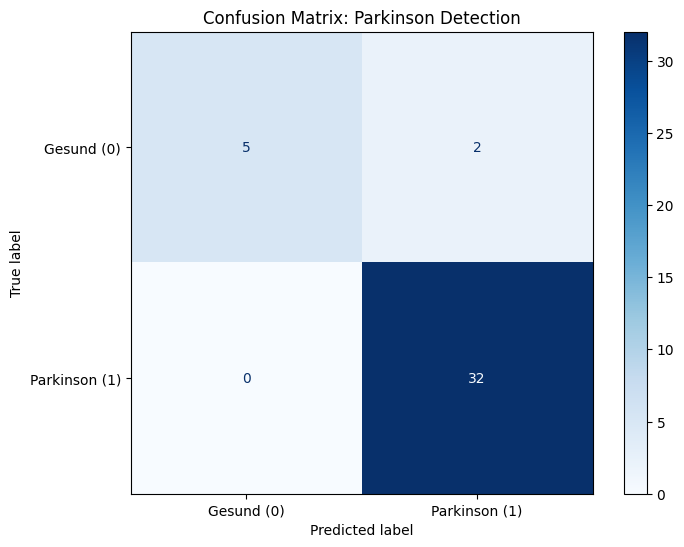

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Erstellt die Confusion Matrix Grafik
# cmap='Blues' sorgt für ein sauberes, blaues Design
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    model, 
    X_test, 
    y_test, 
    display_labels=['Gesund (0)', 'Parkinson (1)'],
    cmap=plt.cm.Blues,
    ax=ax
)

plt.title('Confusion Matrix: Parkinson Detection')
plt.savefig('C:/Users/sahan/Codin_Projects/Parkinson/plots/confusion_matrix.jpg', dpi=300, bbox_inches='tight')
plt.show()

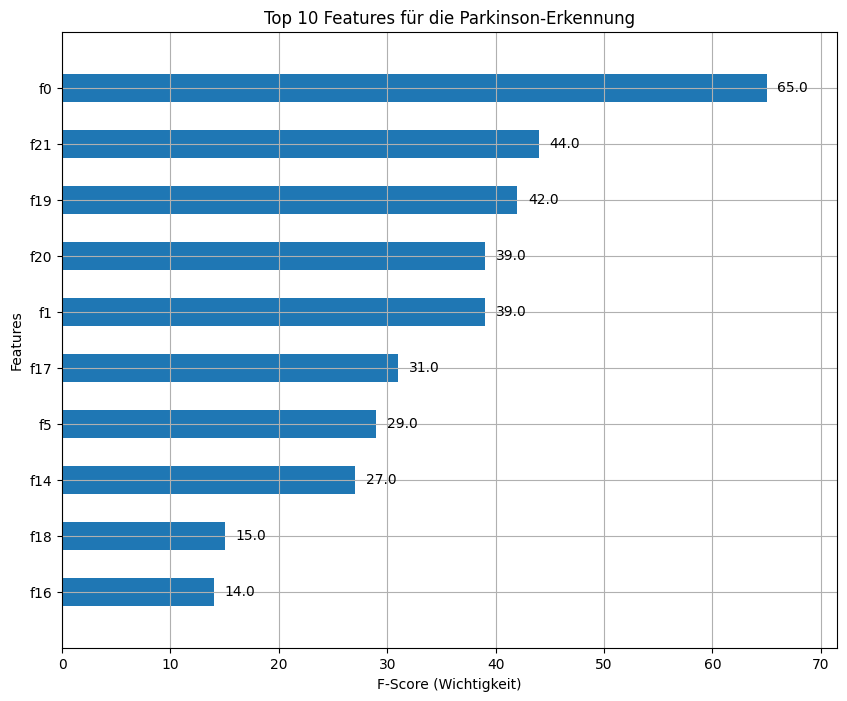

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(model, ax=ax, max_num_features=10, height=0.5)

plt.title('Top 10 Features für die Parkinson-Erkennung')
plt.xlabel('F-Score (Wichtigkeit)')
plt.savefig('C:/Users/sahan/Codin_Projects/Parkinson/plots/feature_importance.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
import os

# 1. Pfad definieren (Relativ: geht einen Ordner hoch und dann in 'models')
model_path = 'C:/Users/sahan/Codin_Projects/Parkinson/models/parkinson_model.json'

# 2. Sicherstellen, dass der Ordner existiert
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# 3. Speichern über den Booster (umgeht den Scikit-Learn Wrapper Fehler)
try:
    model.get_booster().save_model(model_path)
    print(f"Erfolg! Modell wurde gespeichert unter: {os.path.abspath(model_path)}")
except Exception as e:
    print(f"Fehler beim Speichern: {e}")

Erfolg! Modell wurde gespeichert unter: C:\Users\sahan\Codin_Projects\Parkinson\models\parkinson_model.json
